## Task 3: Prediction of Iris flower class using Decision Tree algorithm and visualizing the tree created by the algorithm
### Name: Annan Dejene Deriba

- The data set provided for this task is the "Iris" data set.
- The task is to use Decision Tree algorithm for the prediction of Iris flower class and visualizing the trees created by the algorithm.

In [1]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data set for this task
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Exploring the dataset

In [3]:
# Getting the dimensions of the data
data.shape

(150, 5)

- There are 150 observations and 5 features.

In [4]:
# Getting the number of null values in each column
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

- There're no missing values in this dataset

In [5]:
# To get a concise summary of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- All columns are of float data type except for the last column species.

In [6]:
# To get how many instances are present for each Iris species
data["species"].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

- We can see that there are 3 Iris species and they are evenly distributed. 

In [7]:
# To get a basic statistical description of the data set
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


- Here we can notice the following things:
 - Mean values show that sepal and petal lengths are relatively large when compared to their respecitve width measurment.
 - Overall sepal measurments are larger than petal measurments. 
 - So we can say that an iris flower generally have smaller petals than sepals and both are longer than they're wide.
 - The mean and median values of the sepal measurments are very close to eachother and the standard deviation is lessthan 1, this suggests that the data points are close to the mean.
 - The mean and median values of the petal measurments are not as close as the values for the sepal measurements, this suggests that there is more variance in the petal measurments.

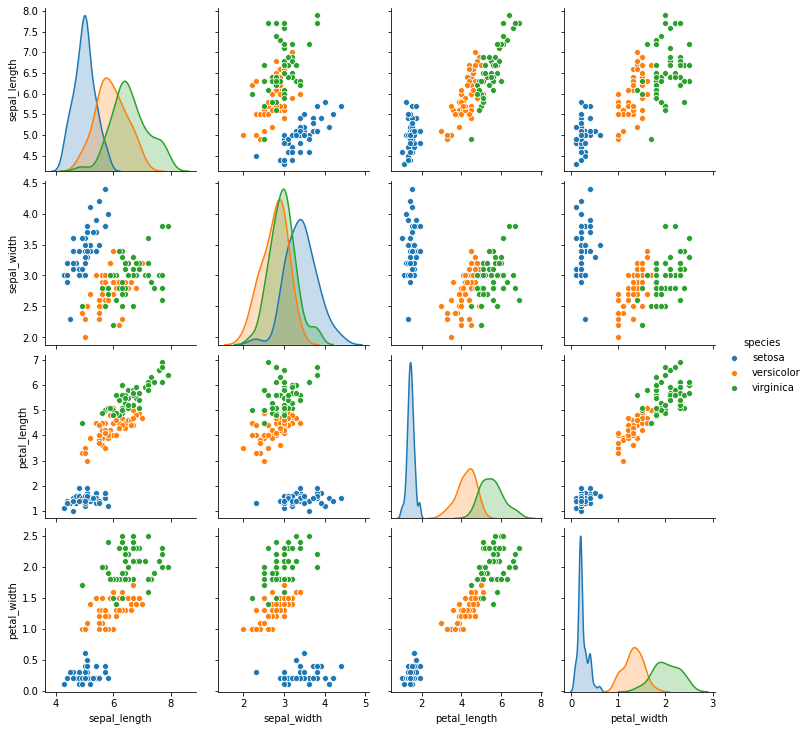

In [8]:
# To plot pairwise relationship between the numerical column and hue of the species.
sns.pairplot(data, hue="species");

- We can see that `setosa (blue)` species appear to separate from the other species in all the scatter plot combination; but they tend to be very distnict in the petal measurment when compared to the sepal measurments. 
- There is a bit of an overlap between `versicolor (orange)` and `virginica (green)`, specially in the sepal measurments.
- Setosa appears to be smaller than the other species in Petal length, Petal width and sepal length; it can also be observed in the histograms, the setosa data is closer to the left than the other sepecies' measurment.
- `Virginica(green)` and `Versicolor (orange)` aren't cleanly distnict from one another but there is a pattern which `virginica (green)` tend to have longer and wider petals than `versicolor (orange)`.

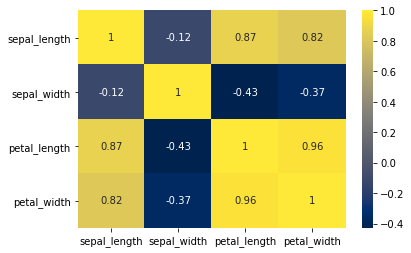

In [9]:
# Visualizing correlations with heatmap
sns.heatmap(data.corr(), annot=True, cmap="cividis");

- Here we can notice that:
 - Petal length and petal width have high positive correlation (0.96), which implies that as the petal length increases so does the petal width. They have a very close relationship.
 - Sepal length and speal width have very weak relationship (-0.11).
 - Petal length and petal width have high positive correlation with Sepal length (0.87 and 0.81 respectively).
 - Petal length and petal width have negative correlation with Speal width (-0.42 and -0.36).
- The yellower the box the more correlated the features are and the dark blue the boxes are the less correlated the features are.

### Data Preparation

In [10]:
# Splitting the dataset to the independent features "X" and dependent variable "y"
X = data.iloc[:, [0,1,2,3]]
y = data.iloc[:, -1]

In [11]:
print("----X-----")
display(X.head())
print("\n----y-----\n")
display(y)

----X-----


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



----y-----



0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

- We can see that our dependent variable "y" contains non-numeric data, so we have to encode it.

In [12]:
# Encoding our variable "y" as it contains non-numeric type
from sklearn.preprocessing import LabelEncoder
lb_ec = LabelEncoder()
y = lb_ec.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Creating our Decision Tree Classifier

In [13]:
# Importing decision tree class and making an object of that class
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [14]:
# Training our algorithm with the dataset
classifier.fit(X, y)

DecisionTreeClassifier()

In [15]:
# Evaluating our classifier's performance by Cross Validation
from sklearn.model_selection import cross_val_score
accuracy_scores = cross_val_score(classifier, X, y, cv=3)
accuracy_scores

array([0.98, 0.94, 0.98])

In [16]:
# The average accuracy got to be 96%
accuracy_scores.mean()

0.9666666666666667

### Visualizing the tree created by the classifier

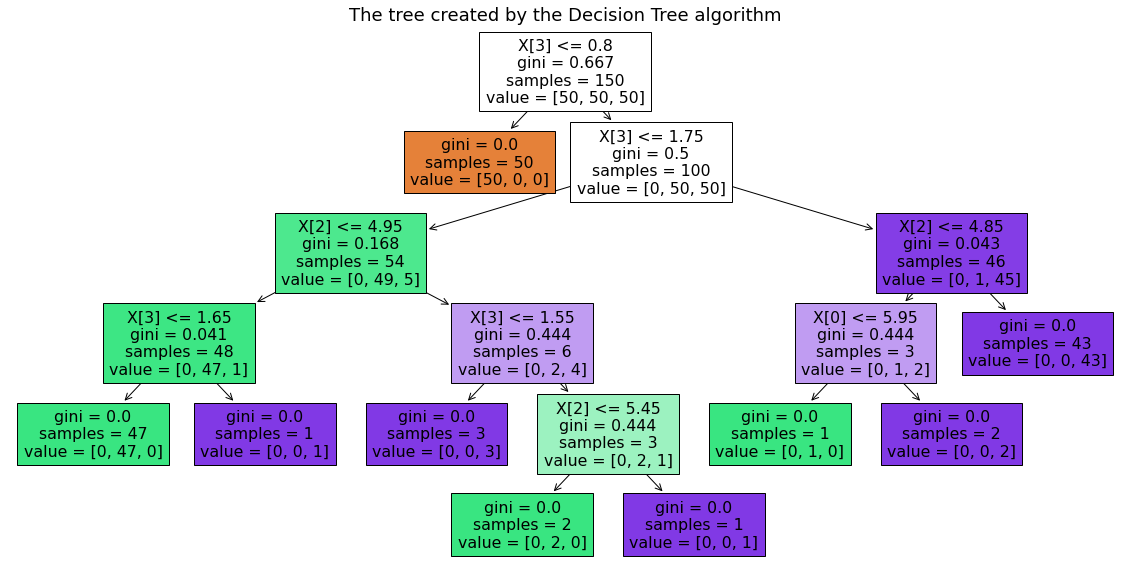

In [17]:
plt.rcParams["figure.figsize"] = 20, 10 # Increasing the size of the figure

from sklearn.tree import plot_tree  # Importing the function to plot the tree

plot_tree(classifier, filled=True) # Plotting the tree
plt.title('The tree created by the Decision Tree algorithm', size=18); # Giving title to the figure